<a href="https://colab.research.google.com/github/jerrycyng/Natural-Language-Processing-Classification-and-Clustering/blob/main/NLP_SMS_classification(Github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.svm import SVC , LinearSVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path ="/content/drive/MyDrive/SMSSpamCollection.csv"
df= pd.read_csv(path)
df
x = df["Subject"]
y = df["Category"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reference 
#https://github.com/abeizer/email-subject-prediction/blob/master/Classification-stopwords.ipynb

In [ ]:
x_train, y_train = x[0:2786],y[0:2786]
x_test, y_test = x[2786:], y[2786:]

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2786,)
(2786,)
(2786,)
(2786,)


What is CountVectorizer?

CountVectorizer is used to transform a given text into a vector on the basis of the frequency of each word that occurs in the entire text. 

In [ ]:
#CountVectorizer 
cv_count= CountVectorizer()
features_count = cv_count.fit_transform(x_train)
features_test_count= cv_count.transform(x_test)
#cv_count.vocabulary_

What is Tfidf Vectorizer? 

TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus but it also provides a numerical representation of how important a word is for statistical analysis.

In [ ]:
#TfidfVectorizer
tf= TfidfVectorizer()
features_tf = tf.fit_transform(x_train)
features_test_tf= tf.transform(x_test)

What is Naive Bayes algorithm?

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [ ]:
#Naive bayes score with CountVectorizer 
n_bayes = MultinomialNB()
n_bayes.fit(features_count, y_train)
n_bayes.score(features_test_count,y_test)

0.9838478104809764

In [ ]:
#Naive bayes score with TfidfVectorizer
n_bayes = MultinomialNB()
n_bayes.fit(features_tf, y_train)
n_bayes.score(features_test_tf,y_test)

0.9490308686288585

What is SVC? 

C-Support Vector Classification is a nonparametric clustering algorithm that does not make any assumption on the number or shape of the clusters in the data. 

In [ ]:
#SVC with CountVectorizer 
svc = SVC()
svc.fit(features_count, y_train)
svc.score(features_test_count, y_test)

0.9781048097631012

In [ ]:
#SVC score with TfidfVectorizer
svc = SVC()
svc.fit(features_tf, y_train)
svc.score(features_test_tf, y_test)

0.9777458722182341

LinearSVC is SVC with parameter kernel=’linear’

In [ ]:
#LinearSVC with CountVectorizer 
svc_linear= LinearSVC()
svc_linear.fit(features_count, y_train)
svc_linear.score(features_test_count, y_test)

0.9806173725771715

In [ ]:
#LinearSVC with TfidfVectorizer
svc_linear= LinearSVC()
svc_linear.fit(features_tf, y_train)
svc_linear.score(features_test_tf, y_test)

0.9849246231155779

What is SGDClassifier?

Stochastic Gradient Descent Classifier is an optimization method and does not correspond to a specific family of machine learning models. It is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions. 

In [ ]:
#SGDClassifier with CountVectorizer
sgd=  SGDClassifier(loss='hinge')
sgd.fit(features_count, y_train)
sgd.score(features_test_count, y_test)

0.9773869346733668

In [ ]:
#SGDClassifier with TfidfVectorizer
sgd=  SGDClassifier(loss='hinge')
sgd.fit(features_tf, y_train)
sgd.score(features_test_tf, y_test)

0.9842067480258435

As described above, the combination of LinearSVC and TfidfVectorizer has the best performance among all others models. 

In the below, we will perform hypertune the parameters for this combination. 

In [ ]:
#LinearSVC Pipeline
lin_svc_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                          ('svm', LinearSVC())])

# LinearSVC Parameters
lin_svc_params = {'tfidf__max_df': (0.25, 0.5, 0.75,1.0),
                  'svm__C': (0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
                  'svm__tol': (1e-3, 1e-4,1e-5,1e-6,1e-7),
                  'svm__dual': (True, False),
                  'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),(1,4)]
                }               

In [ ]:
'''
# LinearSVC Pipeline
lin_svc_pipeline = Pipeline([('vect', CountVectorizer()),
                          ('svm', LinearSVC())])

# LinearSVC Parameters
lin_svc_params = {'vect__ngram_range': [(1, 1), (1, 2),(1,3),(1,4)],
                  'svm__C': (0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
                  'svm__tol': (1e-3, 1e-4,1e-5,1e-6,1e-7),
                  'svm__dual': (True, False),
                  'vect__max_features':(None, 5000, 10000, 50000),
                }               
'''   

"\n# LinearSVC Pipeline\nlin_svc_pipeline = Pipeline([('vect', CountVectorizer()),\n                          ('svm', LinearSVC())])\n\n# LinearSVC Parameters\nlin_svc_params = {'vect__ngram_range': [(1, 1), (1, 2),(1,3),(1,4)],\n                  'svm__C': (0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),\n                  'svm__tol': (1e-3, 1e-4,1e-5,1e-6,1e-7),\n                  'svm__dual': (True, False),\n                  'vect__max_features':(None, 5000, 10000, 50000),\n                }               \n"

In [ ]:
gridSearch = GridSearchCV(lin_svc_pipeline, lin_svc_params, n_jobs=-1)
#gridSearch = GridSearchCV(lin_svc_pipeline, lin_svc_params, n_jobs=-1, verbose=1, cv=5)
gridSearch = gridSearch.fit(x_train, y_train)

In [ ]:
print(gridSearch.best_score_)
print(gridSearch.best_params_)

0.9845640045558965
{'svm__C': 0.7, 'svm__dual': True, 'svm__tol': 0.001, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 2)}


In [ ]:
tf_adjusted= TfidfVectorizer(max_df=0.5,ngram_range=(1, 2))
features_adjusted= tf_adjusted.fit_transform(x_train)

In [ ]:
svc_linear_adjusted= LinearSVC(C=0.7,tol=0.001,dual=True)
svc_linear_adjusted.fit(features_adjusted,y_train)

LinearSVC(C=0.7, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)

In [63]:
features_test_adjusted= tf_adjusted.transform(x_test)

print("Accuracy: ", svc_linear_adjusted.score(features_test_adjusted,y_test))

predictions = svc_linear_adjusted.predict(features_test_adjusted)
predict = pd.DataFrame(predictions)


Accuracy:  0.9834888729361091


make_confusion_matrix() 

https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

In [61]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          title=None):
  
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

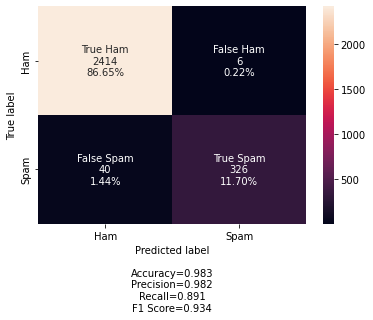

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix= confusion_matrix(y_test,predictions)
df_name=['True Ham','False Ham','False Spam','True Spam']
df_categories= ['Ham','Spam']
make_confusion_matrix(cf_matrix, group_names=df_name,categories=df_categories)
#print(classification_report(y_test,predictions))

In [ ]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
predict.reset_index(drop=True, inplace=True)
result = pd.concat([x_test, y_test, predict], axis=1,ignore_index=True)
result.columns =['SMS','real','predicted']
result

,SMS,real,predicted
0,Yeah get the unlimited,ham,ham
1,cThen i thk shd b enuff.. Still got conclusion...,ham,ham
2,"Forgot it takes me 3 years to shower, sorry. W...",ham,ham
3,Ü got wat to buy tell us then ü no need to com...,ham,ham
4,When you are big..| God will bring success.,ham,ham
...,...,...,...
2781,This is the 2nd time we have tried 2 contact u...,spam,spam
2782,Will ü b going to esplanade fr home?,ham,ham
2783,"Pity, * was in mood for that. So...any other s...",ham,ham
2784,The guy did some bitching but I acted like i'd...,ham,ham
